## Tutorial 24 - Airfoil Polar Simulation
Welcome to this tutorial on performing aerodynamic analysis of a turbofan aircraft using RCAIDE. This guide will walk you through the code, explain its components, and highlight where modifications can be made to customize the simulation for different vehicle designs.

---

## 1. Header and Imports


The **Imports** section is divided into two parts: general-purpose Python libraries and simulation-specific libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 2. RCAIDE Imports

The **RCAIDE Imports** section includes the core modules needed for the simulation. These libraries provide specialized classes and tools for building, analyzing, and running aircraft models.

### Key Imports:

1. **RCAIDE**: The core package is imported directly. This approach allows us to access specific classes and methods from RCAIDE without repeatedly importing individual components at the top of the script.

2. **`Units` Module**: The Units module is a standardized way to handle unit conversions within RCAIDE. It ensures consistent units across all inputs and outputs, reducing the likelihood of conversion errors.

3. **compute_naca_4series**: This function generates the geometry of an NACA 4-series airfoil. It's a built-in method that simplifies the process of creating airfoil profiles.

4. **airfoil_analysis**: This function performs the aerodynamic analysis of an airfoil.

In [2]:
from RCAIDE.Framework.Core import Units
from RCAIDE.Library.Methods.Aerodynamics.Airfoil_Panel_Method   import airfoil_analysis   
from RCAIDE.Library.Methods.Geometry.Airfoil    import compute_naca_4series
from RCAIDE.Library.Plots  import *

## 3. Define Variables and Airfoil Geometry

This section defines the Reynolds number and angle of attack values that the analysis will be performed at. It also then defines the NACA airfoil type (NACA 2410) and uses the built-in geometry generator to create the airfoil geometry. Non-NACA airfoils can be used by specifying the airfoil file name and calling the 'airfoil' class in RCAIDE.Library.Components.Airfoils and specifying the 'coordinate_file' location.

In [3]:
# define Reynolds numbers 
Re_vals            = np.atleast_2d(np.ones(7)*1E5)  

# define angle of attack swee
AoA_vals           = np.atleast_2d(np.linspace(-4,8,7)*Units.degrees) 

# define airfoil name 
airfoil_file       = '2410'

# we are going to use the built-in geometry generator 
airfoil_geometry   = compute_naca_4series(airfoil_file,npoints = 51)

## 4. Analyze Airfoil and Plot Results

This section analzes the airfoil at the specified Reynolds numbers and angle of attack values for the specified airfoil geometry. 

The results are then plotted using the built-in plotting functions. Specifically, the plot_airfoil_surface_forces function plots the surface forces of the airfoil, the plot_airfoil_polars function plots the polars of the airfoil, and the plot_airfoil_boundary_layer_properties function plots the boundary layer properties of the airfoil. More detail on these functions can be found in the RCAIDE documentation.

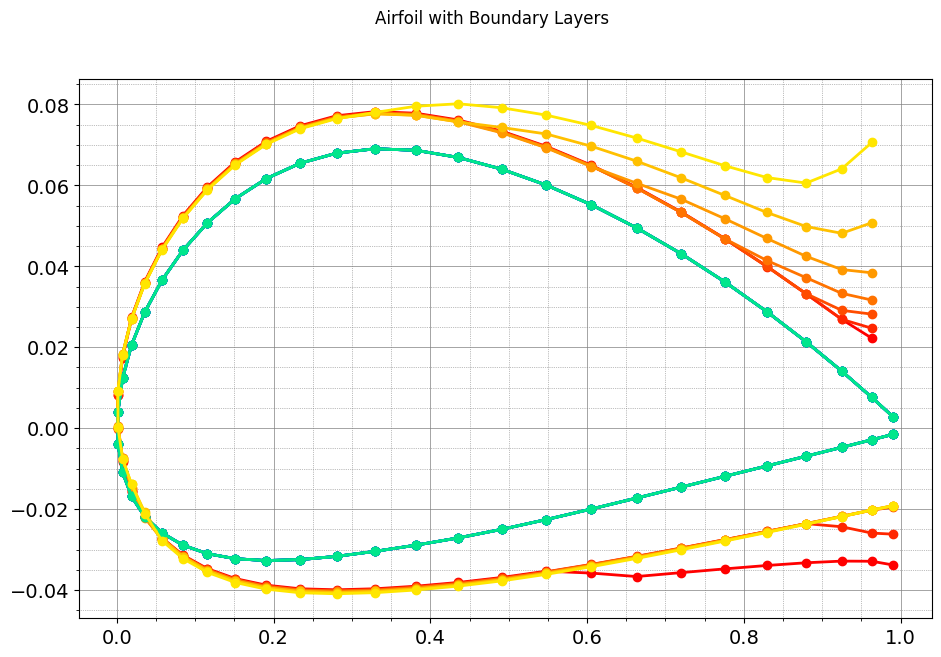

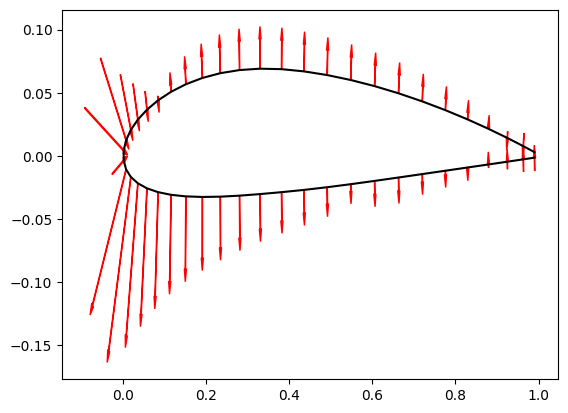

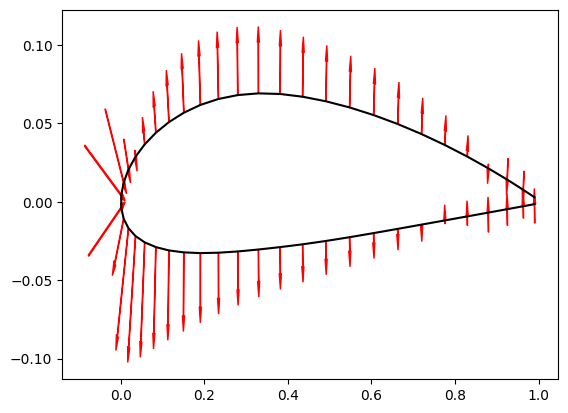

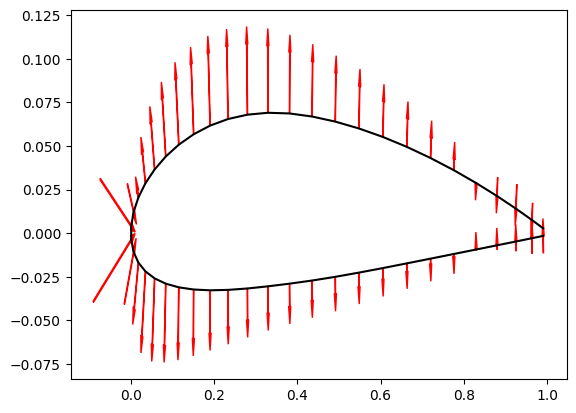

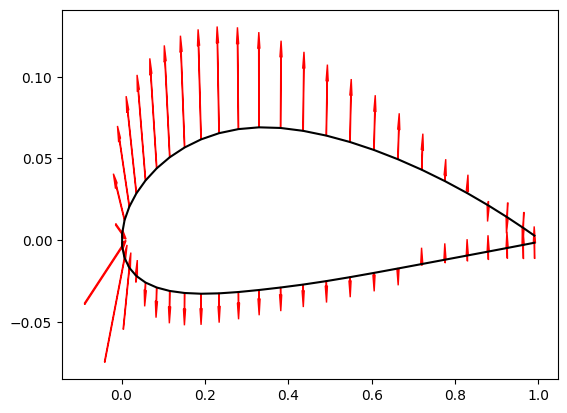

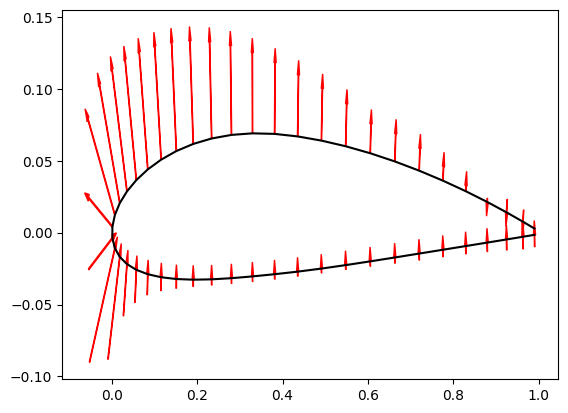

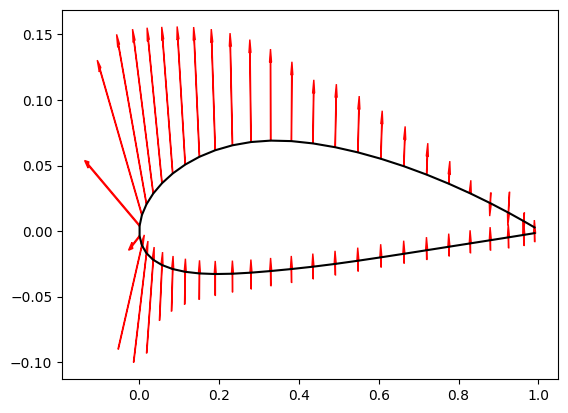

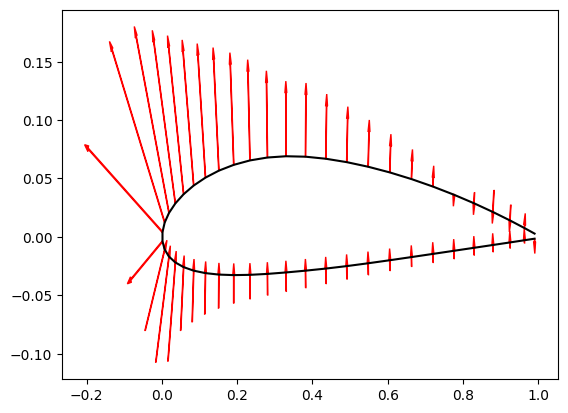

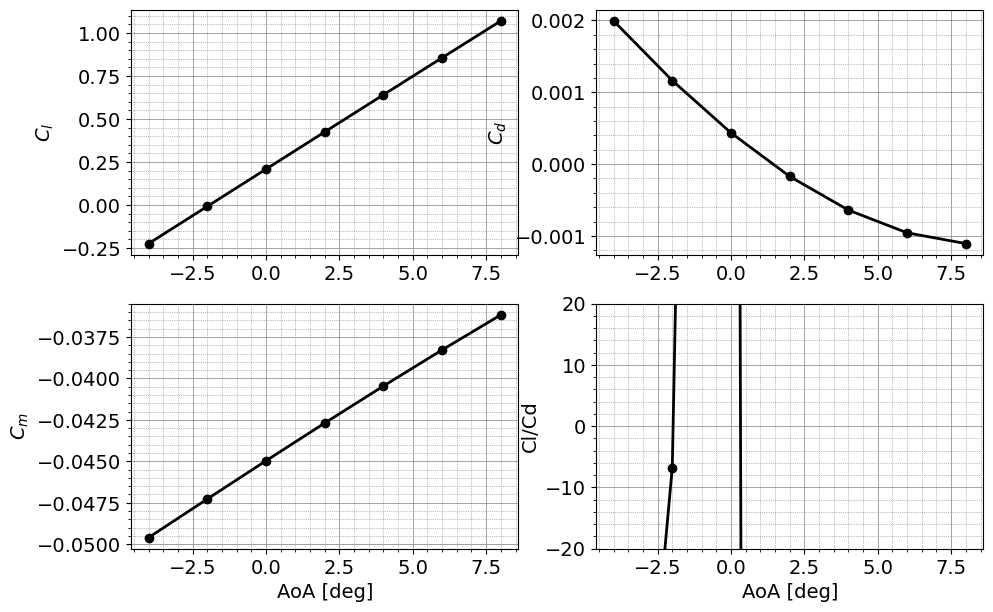

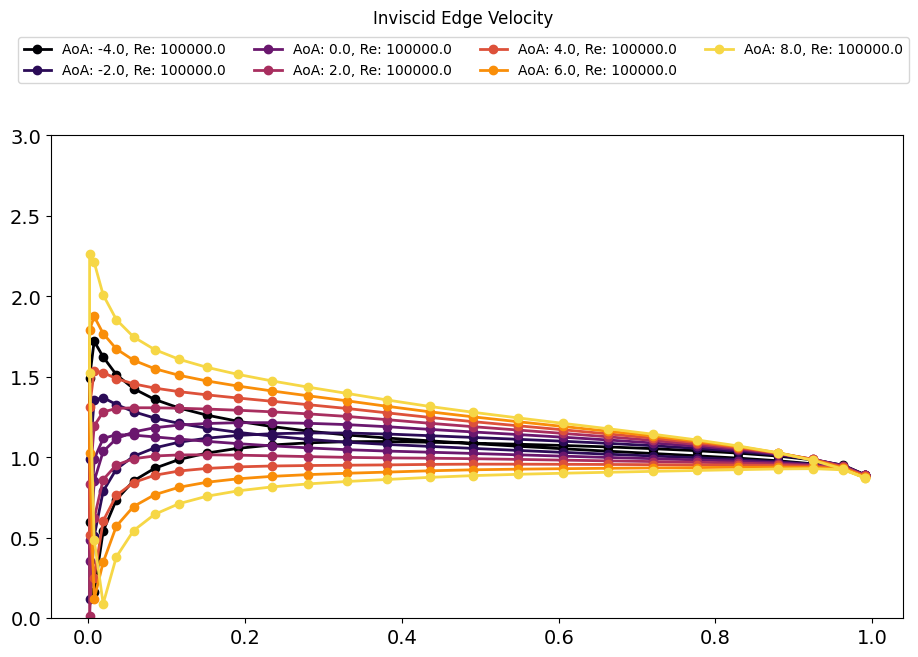

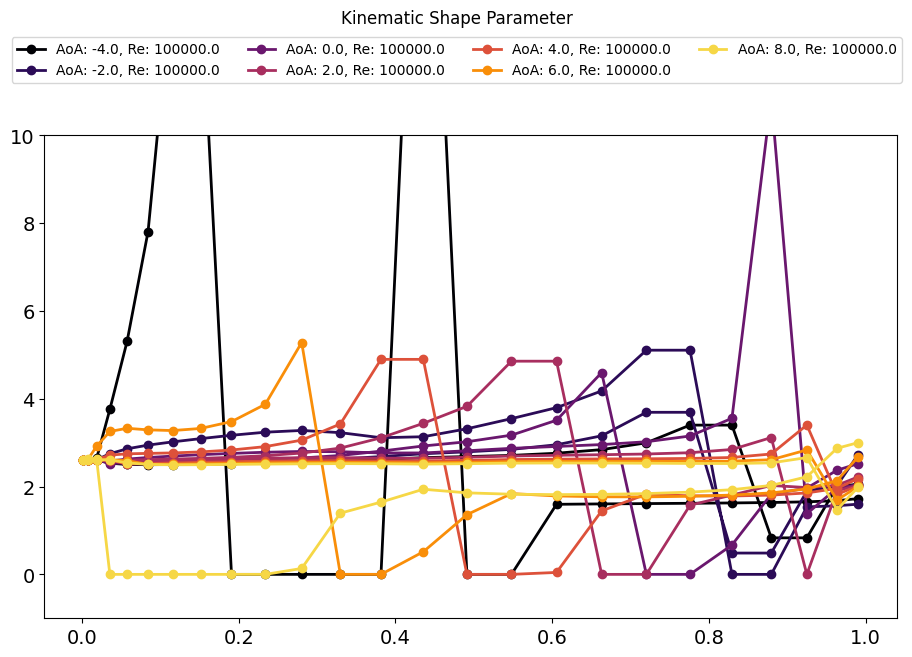

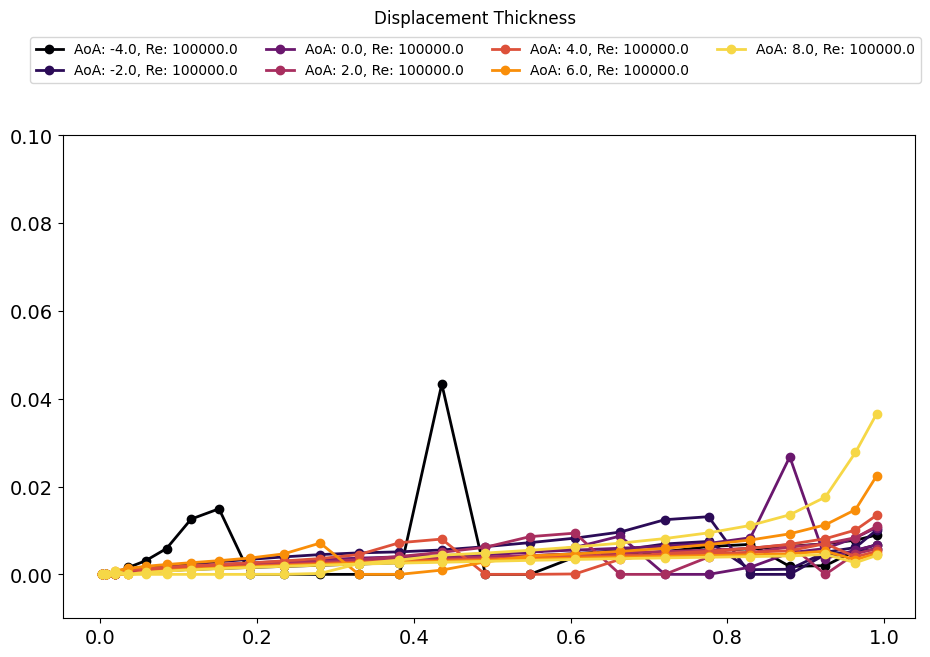

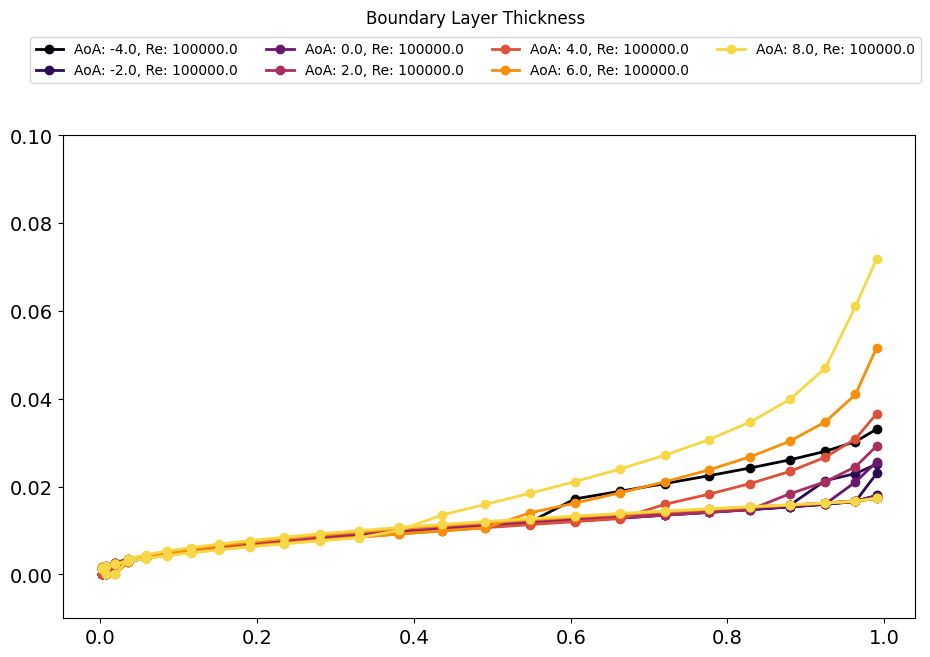

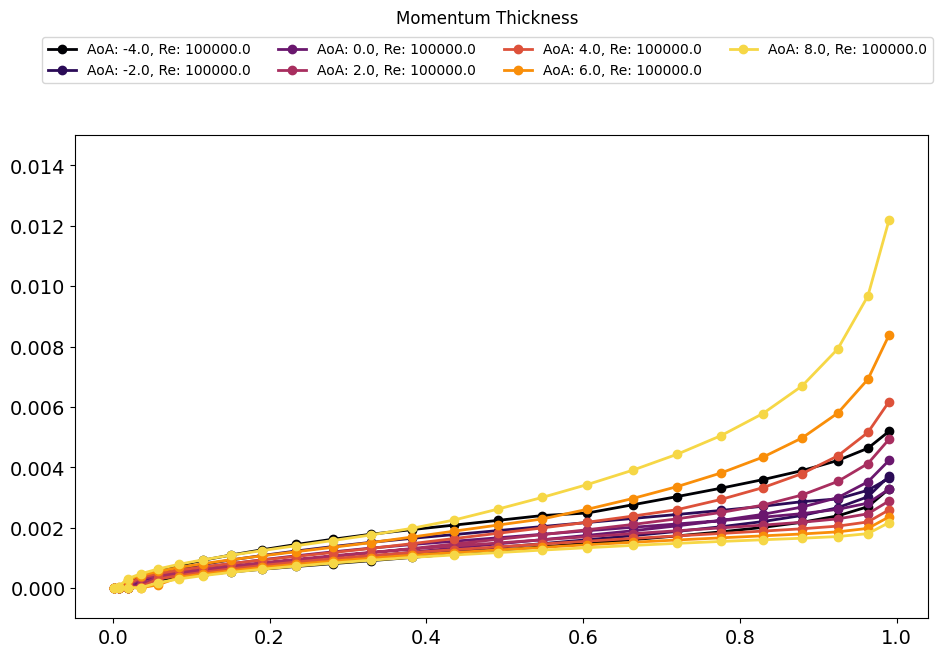

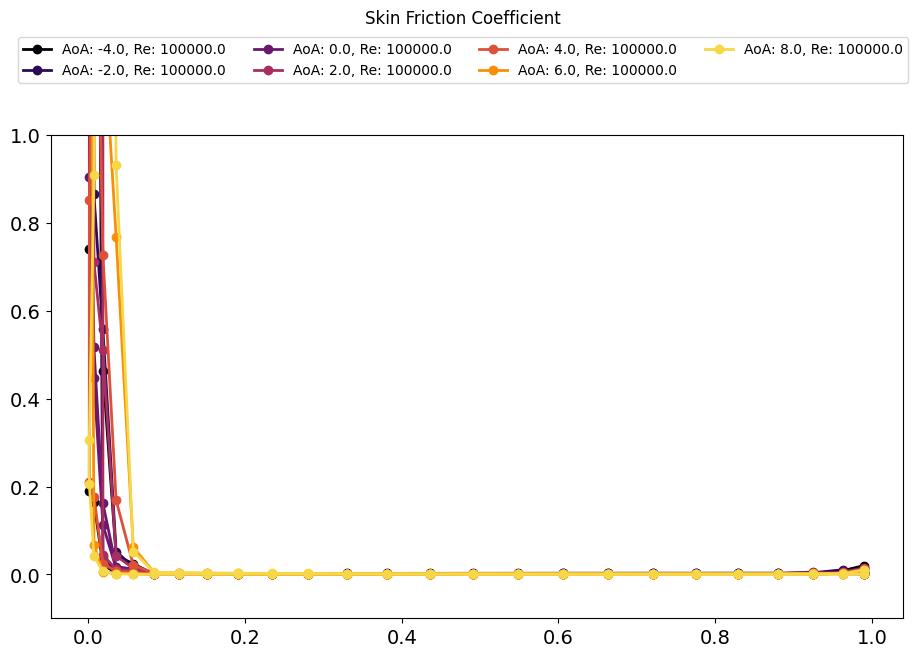

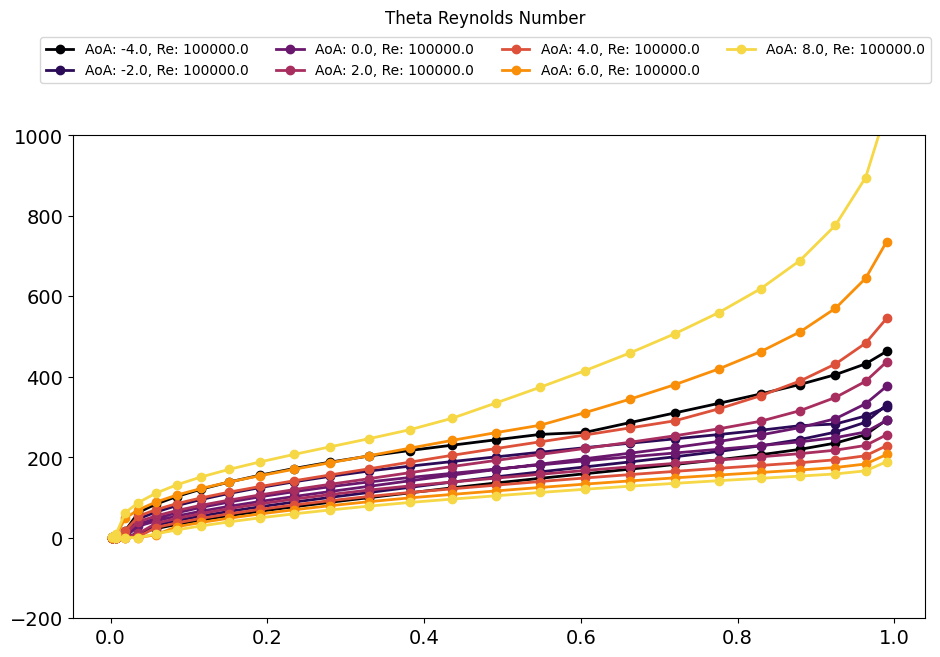

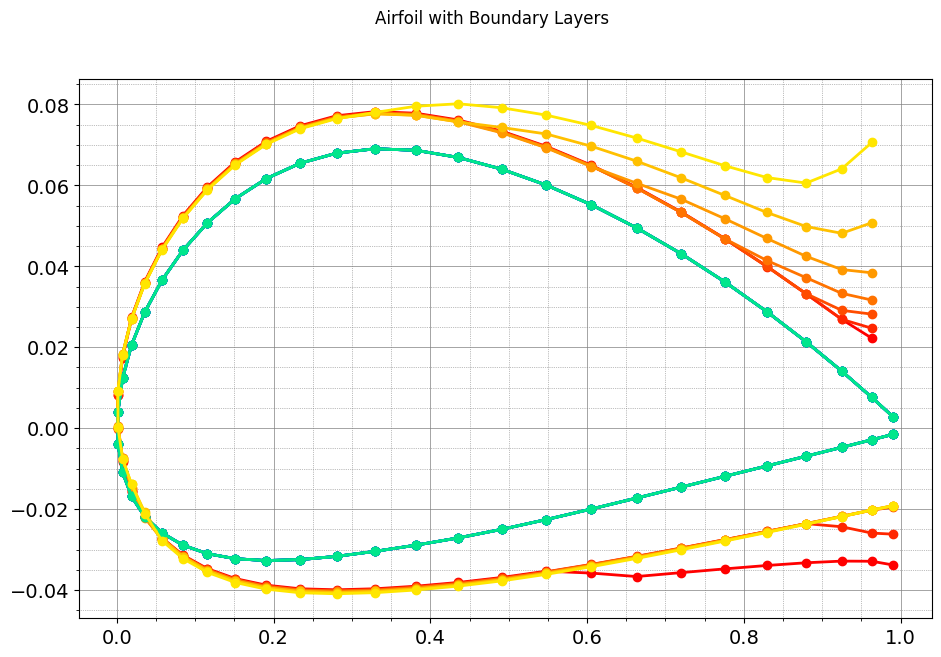

In [4]:
# compute airfoil properties using panel code 
airfoil_properties = airfoil_analysis(airfoil_geometry,AoA_vals,Re_vals)  

# Plots     
plot_airfoil_surface_forces(airfoil_properties)   
plot_airfoil_polars(airfoil_properties) 
plot_airfoil_boundary_layer_properties(airfoil_properties,show_legend = True)   